In [4]:
# -------------------------------
# 1. IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

os.chdir('//Users//sneha//Downloads')
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Convert categorical columns into numeric 
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


In [6]:
X = df_encoded.drop("Attrition_Yes", axis=1)   # target column becomes Attrition_Yes after encoding
y = df_encoded["Attrition_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test_scaled)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy*100, 2), "%")


Model Accuracy: 89.67 %


In [11]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

       False       0.92      0.96      0.94       320
        True       0.65      0.46      0.54        48

    accuracy                           0.90       368
   macro avg       0.78      0.71      0.74       368
weighted avg       0.89      0.90      0.89       368




Confusion Matrix:
 [[308  12]
 [ 26  22]]


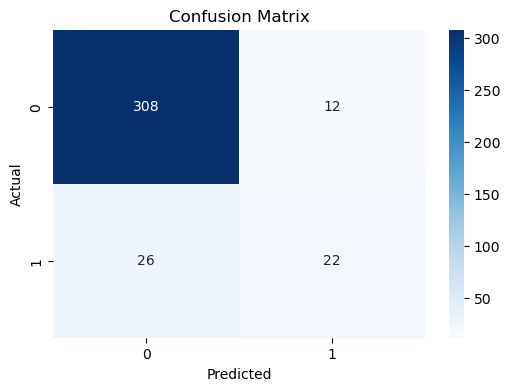

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(model.coef_[0])
}).sort_values(by="Importance", ascending=False)

importance.head(10)


,Feature,Importance
46,OverTime_Yes,0.953019
22,YearsAtCompany,0.767647
37,JobRole_Laboratory Technician,0.736176
26,BusinessTravel_Travel_Frequently,0.730355
23,YearsInCurrentRole,0.684588
45,MaritalStatus_Single,0.600215
19,TotalWorkingYears,0.571072
13,NumCompaniesWorked,0.531583
27,BusinessTravel_Travel_Rarely,0.509706
43,JobRole_Sales Representative,0.464141
